<a href="https://colab.research.google.com/github/Mbigdeli2003/Deep-Learning/blob/main/DNN_HW3_Q2_Morteza_Bigdel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN_HW3_Q2_Morteza_Bigdel

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


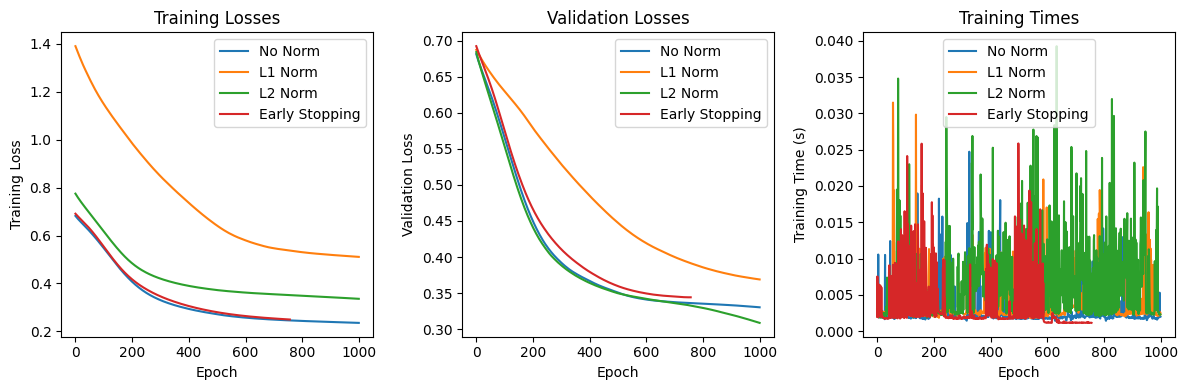

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from google.colab import drive
drive.mount('/content/drive')
data = np.load('/content/drive/MyDrive/2d_pcl_dataset.npz')
X = data['X']
y = data['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
epochs=1000
l_lambda=0.01
# Define MLP network
input_size = 2
hidden_size = 64
output_size = 1
# MLP network without norm penalty
def mlp_no_norm():
    model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Sigmoid()
)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []
    train_times = []

    for epoch in range(epochs):
        start_time = time.time()

        # Training
        model.train()
        y_pred = model(torch.from_numpy(X_train).float())
        loss = criterion(y_pred.squeeze(), torch.from_numpy(y_train).float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(torch.from_numpy(X_val).float())
            val_loss = criterion(y_val_pred.squeeze(), torch.from_numpy(y_val).float())
        val_losses.append(val_loss.item())

        train_times.append(time.time() - start_time)

    return train_losses, val_losses, train_times

# MLP network with L1 norm penalty
def mlp_l1_norm():
    model_mlp_l1_norm =nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Sigmoid()
)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model_mlp_l1_norm.parameters(), lr=0.001)

    train_losses_l1 = []
    val_losses_l1 = []
    train_times_l1 = []
    l1_reg = torch.tensor(0.)
    for epoch in range(epochs):
        start_time = time.time()
        # Training
        model_mlp_l1_norm.train()
        y_pred = model_mlp_l1_norm(torch.from_numpy(X_train).float())
        loss_l1 = criterion(y_pred.squeeze(), torch.from_numpy(y_train).float())
    # Calculate L2 regularization loss
        l1_reg = torch.tensor(0.)
        for param in model_mlp_l1_norm.parameters():
            l1_reg += torch.norm(param,p=1)
        loss_l1 = l_lambda * l1_reg+loss_l1
        optimizer.zero_grad()
        loss_l1.backward()
        optimizer.step()
        train_losses_l1.append(loss_l1.item())
        # Validation
        model_mlp_l1_norm.eval()
        with torch.no_grad():
            y_val_pred = model_mlp_l1_norm(torch.from_numpy(X_val).float())
            val_loss_l1 = criterion(y_val_pred.squeeze(), torch.from_numpy(y_val).float())
        val_losses_l1.append(val_loss_l1.item())

        train_times_l1.append(time.time() - start_time)

    return train_losses_l1, val_losses_l1, train_times_l1


# MLP network with L1 norm penalty
def mlp_l2_norm():
    model_mlp_l2_norm =nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Sigmoid()
)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model_mlp_l2_norm.parameters(), lr=0.001)

    train_losses = []
    val_losses = []
    train_times = []
    l2_reg = torch.tensor(0.)
    for epoch in range(epochs):
        start_time = time.time()

        # Training
        model_mlp_l2_norm.train()
        y_pred = model_mlp_l2_norm(torch.from_numpy(X_train).float())
        loss = criterion(y_pred.squeeze(), torch.from_numpy(y_train).float())
    # Calculate L2 regularization loss
        l2_reg = torch.tensor(0.)
        for param in model_mlp_l2_norm.parameters():
            l2_reg += torch.norm(param,p=2)
        loss += l_lambda * l2_reg
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        # Validation
        model_mlp_l2_norm.eval()
        with torch.no_grad():
            y_val_pred = model_mlp_l2_norm(torch.from_numpy(X_val).float())
            val_loss = criterion(y_val_pred.squeeze(), torch.from_numpy(y_val).float())
        val_losses.append(val_loss.item())

        train_times.append(time.time() - start_time)

    return train_losses, val_losses, train_times


# MLP network without norm penalty with early stopping
def mlp_early_stopping():
    model =nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Sigmoid()
)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []
    train_times = []

    best_val_loss = float('inf')
    patience = 10
    wait = 0

    for epoch in range(epochs):
        start_time = time.time()

        # Training
        model.train()
        y_pred = model(torch.from_numpy(X_train).float())
        loss = criterion(y_pred.squeeze(), torch.from_numpy(y_train).float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(torch.from_numpy(X_val).float())
            val_loss = criterion(y_val_pred.squeeze(), torch.from_numpy(y_val).float())
        val_losses.append(val_loss.item())

        train_times.append(time.time() - start_time)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                break

    return train_losses, val_losses, train_times

# Compare the results
train_losses_no_norm, val_losses_no_norm, train_times_no_norm = mlp_no_norm()
train_losses_l1_norm, val_losses_l1_norm, train_times_l1_norm = mlp_l1_norm()
train_losses_l2_norm, val_losses_l2_norm, train_times_l2_norm = mlp_l2_norm()
train_losses_early_stopping, val_losses_early_stopping, train_times_early_stopping = mlp_early_stopping()

# Plot training losses
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses_no_norm, label='No Norm')
plt.plot(train_losses_l1_norm, label='L1 Norm')
plt.plot(train_losses_l2_norm, label='L2 Norm')
plt.plot(train_losses_early_stopping, label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Losses')
plt.legend()

# Plot validation losses
plt.subplot(1, 3, 2)
plt.plot(val_losses_no_norm, label='No Norm')
plt.plot(val_losses_l1_norm, label='L1 Norm')
plt.plot(val_losses_l2_norm, label='L2 Norm')
plt.plot(val_losses_early_stopping, label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Losses')
plt.legend()
# Plot training times
plt.subplot(1, 3, 3)
plt.plot(train_times_no_norm, label='No Norm')
plt.plot(train_times_l1_norm, label='L1 Norm')
plt.plot(train_times_l2_norm, label='L2 Norm')
plt.plot(train_times_early_stopping, label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Training Time (s)')
plt.title('Training Times')
plt.legend()

plt.tight_layout()
plt.show()